# Chapter 1_7 生存分析
----
author: W.Y.  
first_edition: 2020/1/16  
last_edition: 2020/1/29  
description: 王汉生老师书的第七章，生存分析的python极简实现  

----

In [18]:
# 导入模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # 画图模块
import matplotlib
import seaborn as sns
import statsmodels.formula.api as smf  
import statsmodels.api as sma
import lmdiag  
from sklearn import metrics
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter
import lifelines

In [2]:
# 导入数据

data = pd.read_csv('E:\Data Mining\SimplePython\Chapter 1 从R到Python\CH 1_7 生存分析\CH 1_7 data.csv')

In [3]:
data.head(20)

,Time,VStatus,HGB,Platelet,Age,LogWBC,LogPBM,Protein,SCalc
0,4.00,0,10.2,1,59,4.0453,0.7782,12,10
1,4.00,0,10.0,1,49,3.9590,1.6232,0,13
2,7.00,0,12.4,1,48,3.7993,1.8573,0,10
3,7.00,0,10.2,1,81,3.5911,1.8808,0,11
4,8.00,0,9.9,1,57,3.8325,1.6532,0,8
5,12.00,0,11.6,1,46,3.6435,1.1461,0,7
6,11.00,0,14.0,1,60,3.7324,1.8451,3,9
7,12.00,0,8.8,1,66,3.8388,1.3617,0,9
8,13.00,0,4.9,0,71,3.6435,1.7924,0,9
9,16.00,0,13.0,1,55,3.8573,0.9031,0,9


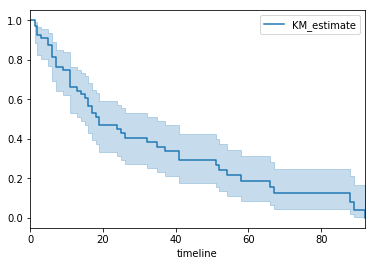

In [4]:
kmf = KaplanMeierFitter()
kmf.fit(data['Time'], event_observed=data['VStatus'])

kmf.plot()

In [5]:
data['status'] = data['HGB'].apply(lambda x: 1 if x>data['HGB'].median() else 0)

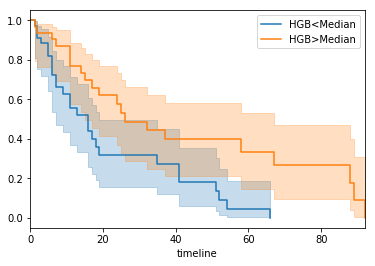

In [6]:
kmf = KaplanMeierFitter()
HGB_group = (data['status'] == 1)
 
kmf.fit(data['Time'][~HGB_group], data['VStatus'][~HGB_group], label='HGB<Median')
ax = kmf.plot()
 
kmf.fit(data['Time'][HGB_group], data['VStatus'][HGB_group], label='HGB>Median')
kmf.plot(ax=ax)

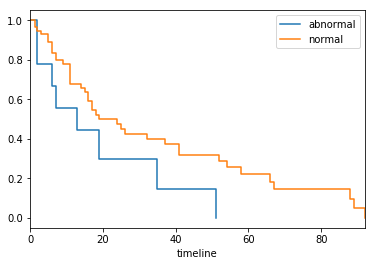

In [13]:
kmf = KaplanMeierFitter()
Platelet = (data['Platelet'] == 1)
 
kmf.fit(data['Time'][~Platelet], data['VStatus'][~Platelet], label='abnormal')
ax = kmf.plot(ci_show=False)
 
kmf.fit(data['Time'][Platelet], data['VStatus'][Platelet], label='normal')
kmf.plot(ax=ax, ci_show=False)

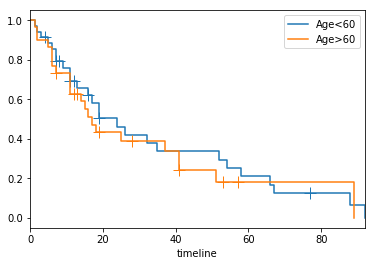

In [12]:
kmf = KaplanMeierFitter()
Age = (data['Age'] > data['Age'].median())
 
kmf.fit(data['Time'][~Age], data['VStatus'][~Age], label='Age<60')
ax = kmf.plot(show_censors=True, ci_show=False)
 
kmf.fit(data['Time'][Age], data['VStatus'][Age], label='Age>60')
kmf.plot(ax=ax,show_censors=True, ci_show=False)

D:\Anaconda\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\Anaconda\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\Anaconda\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes usi

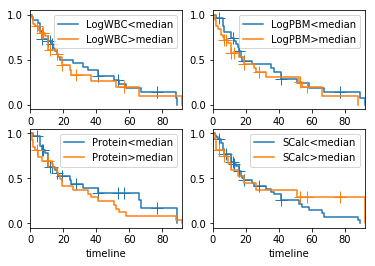

In [16]:
kmf = KaplanMeierFitter()
LogWBC = (data['LogWBC'] > data['LogWBC'].median())
LogPBM = (data['LogPBM'] > data['LogPBM'].median())
Protein = (data['Protein'] > data['Protein'].median())
SCalc = (data['SCalc'] > data['SCalc'].median())

kmf.fit(data['Time'][~LogWBC], data['VStatus'][~LogWBC], label='LogWBC<median')
kmf.plot(ax=plt.subplot(2,2,1), show_censors=True, ci_show=False)
kmf.fit(data['Time'][LogWBC], data['VStatus'][LogWBC], label='LogWBC>median')
kmf.plot(ax=plt.subplot(2,2,1),show_censors=True, ci_show=False)

kmf.fit(data['Time'][~LogPBM], data['VStatus'][~LogPBM], label='LogPBM<median')
kmf.plot(ax=plt.subplot(2,2,2), show_censors=True, ci_show=False)
kmf.fit(data['Time'][LogPBM], data['VStatus'][LogPBM], label='LogPBM>median')
kmf.plot(ax=plt.subplot(2,2,2),show_censors=True, ci_show=False)

kmf.fit(data['Time'][~Protein], data['VStatus'][~Protein], label='Protein<median')
kmf.plot(ax=plt.subplot(2,2,3), show_censors=True, ci_show=False)
kmf.fit(data['Time'][Protein], data['VStatus'][Protein], label='Protein>median')
kmf.plot(ax=plt.subplot(2,2,3),show_censors=True, ci_show=False)

kmf.fit(data['Time'][~SCalc], data['VStatus'][~SCalc], label='SCalc<median')
kmf.plot(ax=plt.subplot(2,2,4), show_censors=True, ci_show=False)
kmf.fit(data['Time'][SCalc], data['VStatus'][SCalc], label='SCalc>median')
kmf.plot(ax=plt.subplot(2,2,4),show_censors=True, ci_show=False)

In [27]:
# AFT模型
weibull = lifelines.WeibullAFTFitter()

weibull.fit(data.iloc[:,0:9], duration_col='Time', event_col='VStatus')
weibull.print_summary()


In [35]:
# Cox模型
cox = lifelines.CoxPHFitter()
cox.fit(data.iloc[:,0:9], duration_col='Time', event_col='VStatus')
cox.print_summary()  

